In [37]:
!pip install tensorflow keras numpy mnist matplotlib

In [0]:
#import packages
import numpy as np
import mnist #the mnist dataset
import matplotlib.pyplot as plt #for graph
from keras.models import Sequential #architecture of the ANN
from keras.layers import Dense #layers of the ann
from keras.utils import to_categorical

In [0]:
#loading dataset
train_images=mnist.train_images() #training data images
train_labels=mnist.train_labels() #training data lables
test_images=mnist.test_images() #testing data images
test_labels=mnist.test_labels() #testing data labels

In [0]:
#normalizing images with pixel values [0,255] to [-0.5,0.5] to make it easier to train the network
train_images=(train_images/255)-0.5; #since (train_images/255) returns a value in the range [0,1] as the max. size of image is 255 pixels and subtracting 0.5 from this result puts the value in the desired range [-0.5,0.5]
test_images=(test_images/255)-0.5;

In [0]:
#flattening the images of size 28x28 into a 784(28^2) dimensional vector to pass into the network
train_images=train_images.reshape((-1,784))
test_images=test_images.reshape((-1,784))

In [42]:
#printing rows and columns i.e,(rows,columns). Here, rows = no. of train/test images(no. of rows) & columns = size of images. Train and Test are splitted in the default ratio.
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [0]:
#the ANN model: 3 layers : 1st layer (input layer) with 64 neurons and input dimensions=784(size of image/columns), 2nd layer with 64 neurons, 3rd layer with 10 neurons (since, 10 digits:0-9)
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
#compile the model. Loss function measures how well the model performed and tries to improve on it with the optimiser
#categorical_crossentropy for classes greater than 2 (here, digits 0-9 i,e, 10 classes). For 2 classes we use binary_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 

In [46]:
#trainging the model
model.fit(train_images,to_categorical(train_labels),epochs=10,batch_size=50) 
#to_categorical use: returns 2(train_label) but the function expects a 10 dimensional vectore like this: [0,0,1,0,0,0,0,0,0,0]. to_categorical converts the label into this vector form.
#epochs: no. of iterations over the entire dataset to train on
#batch_size: number of training exmaples used in 1 iteration

Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0384 - accuracy: 0.9871
Epoch 2/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0352 - accuracy: 0.9876
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0373 - accuracy: 0.9876
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0355 - accuracy: 0.9877
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0322 - accuracy: 0.9887
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0325 - accuracy: 0.9887
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0297 - accuracy: 0.9897
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0316 - accuracy: 0.9890
Epoch 9/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0274 - accuracy: 0.9904
Epoch 10/10
60000/60000 [==============================

In [47]:
#evaluation of the model
model.evaluate(test_images,to_categorical(test_labels))
#RESULT: (loss,accuracy)

10000/10000 [==============================] - 0s 26us/step


[0.11278381508152743, 0.9739999771118164]

In [48]:
#prediction on the 1st 6 test images
predictions = model.predict(test_images[:6])
#argmax function gives us the actual labels of the predictions. Else, print(prediction) only gives us the probabilities
print(np.argmax(predictions,axis=1)) #axis =1 or axis=0 specifies the particular direction in the array
print(test_labels[:6])

[7 2 1 0 4 1]
[7 2 1 0 4 1]


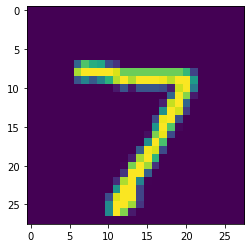

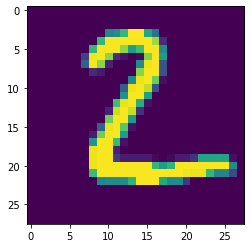

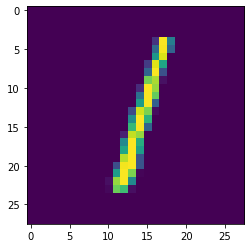

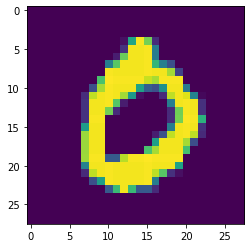

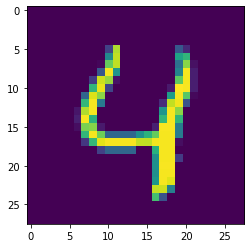

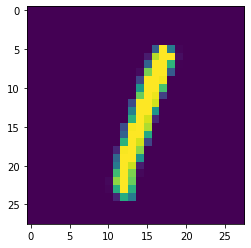

In [49]:
for i in range (0,6):
  img=test_images[i]
  img=np.array(img,dtype='float')
  pixels=img.reshape(28,28) #converting the test image in the form of a numpy float array in img into an actual image of dimensions 28x28(original)
  plt.imshow(pixels)
  
  #plt.imshow(pixels,cmap='gray') to display grayscale images
  plt.show() #displays the fig. and enters the main loop again hence,displays all the figs. If it is skipped then imshow() will only display the current figure i.e, the image of the last digit in the array (in this case 1)